In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
img_in = plt.imread('beans.png')
img0 = np.floor(img_in[:,:,1] * 256).astype(int)
# img0 = np.floor(np.sum(img_in[:,:,:3], axis=2)/3 * 256).astype(int)
M, N = img0.shape
C = 256

In [3]:
def get_histogram(img):
    histogram = np.zeros(256, dtype=int)
    for val in img.flatten():
        histogram[val] += 1
    return histogram

In [4]:
def plot_hist(hist):
    plt.bar(np.arange(0, 256, dtype=int), hist)

In [5]:
def plot_img_hist(img):
    _, axarr = plt.subplots(1, 2, figsize=(8,4))
    axarr[0].imshow(img, cmap='grey', vmin=0, vmax=256)
    axarr[1].bar(np.arange(0, 256, dtype=int), get_histogram(img))
    # axarr[1].hist(img.flatten(), np.arange(0, 256))

In [6]:
def cdf(hist):
    s = np.zeros(256, dtype=int)
    for r in range(1, 256):
        s[r] = s[r-1] + hist[r]
    return np.floor(s * 255 / (M * N)).astype(int)
    

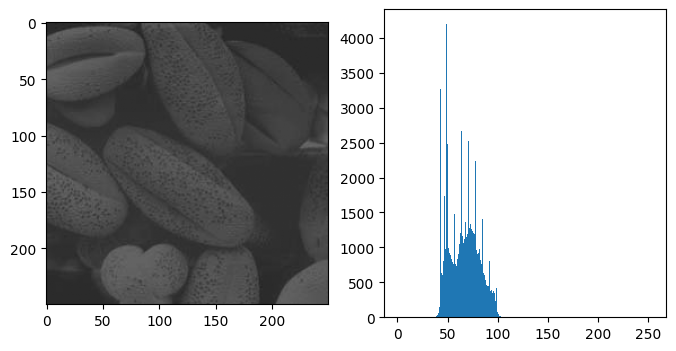

In [15]:
plot_img_hist(img0)

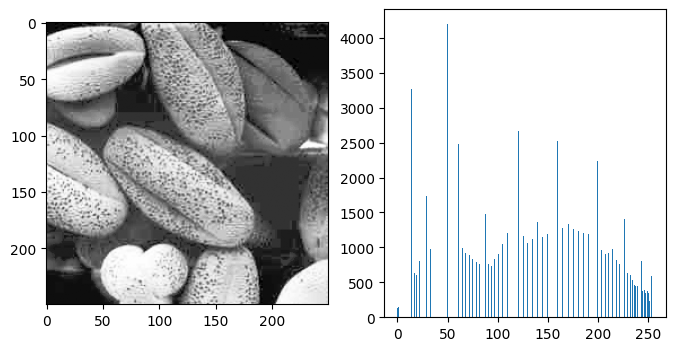

In [17]:
g = get_histogram(img0)
T = cdf(g)
img1 = np.vectorize(lambda r: T[r])(img0)
plot_img_hist(img1)